Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import ensemble
from datetime import datetime
import scipy.stats as stats
import altair as alt
from vega_datasets import data

import clean csv in dataframes

In [2]:
df_ventes = pd.read_csv(r"C:\Users\utilisateur\Documents\Projets\brief_librairie\ventes.csv")
df_produits = pd.read_csv(r"C:\Users\utilisateur\Documents\Projets\brief_librairie\produits.csv")
df_clients = pd.read_csv(r"C:\Users\utilisateur\Documents\Projets\brief_librairie\clients.csv")

Create a unique dataframe

In [3]:
df_all = df_ventes.merge(df_clients, how='left', on='client_id').merge(df_produits, how='left', on='id_prod')
df_all

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


let's print the infos number of price

In [4]:
df_all["price"].describe(include='all')

count    336913.000000
mean         17.204376
std          17.855658
min          -1.000000
25%           8.580000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

print where the price is equal to -1

In [5]:
df_all.loc[df_all['price'] == -1]

,id_prod,date,session_id,client_id,sex,birth,price,categ
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,-1.0,0.0
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,-1.0,0.0
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,-1.0,0.0
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,-1.0,0.0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,-1.0,0.0
...,...,...,...,...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,f,2001,-1.0,0.0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,-1.0,0.0
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1,m,2001,-1.0,0.0
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1,m,2001,-1.0,0.0


We see that this datas are test data so we chose to delete them

In [6]:
df_all = df_all[df_all.price != -1]
df_all

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


we have now 336816 columns cause we droped the 200 where the price was 1

let's check if the date of birth is legit

In [7]:
df_all["birth"].describe(include='all')

count    336816.000000
mean       1977.823396
std          13.523923
min        1929.000000
25%        1971.000000
50%        1980.000000
75%        1987.000000
max        2004.000000
Name: birth, dtype: float64

we got a min at 1929 and a max at 2004 so the data seems legit

let's create a new columns to print the total of purchase by client id

In [8]:
df_all = df_all.merge(
    df_all.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')

let's see the 10 biggest clients

In [9]:
df_10_clients = df_all.drop_duplicates(subset =["client_id"])
df_top_10 = df_10_clients.nlargest(10,"total_achats")
df_top_10

,id_prod,date,session_id,client_id,sex,birth,price,categ,total_achats
62,0_1420,2021-11-23 15:03:23.901688,s_123928,c_1609,m,1980,11.53,0.0,162007.34
260,2_233,2021-10-03 01:57:22.634598,s_99180,c_4958,m,1999,172.99,2.0,144257.21
182,0_1583,2021-05-10 12:07:55.250394,s_32555,c_6714,f,1968,15.99,0.0,73197.34
204,0_1801,2021-07-08 07:38:11.501278,s_59436,c_3454,m,1969,3.99,0.0,54442.92
2350,0_1449,2021-04-28 21:52:08.237285,s_27152,c_7959,f,1974,4.99,0.0,2564.25
1547,0_1564,2021-10-10 06:33:10.723148,s_102631,c_4491,f,1984,11.12,0.0,2540.53
1072,1_308,2022-02-03 21:03:47.242872,s_159547,c_8026,m,1978,11.65,1.0,2537.67
3126,1_36,2022-01-23 12:02:55.337714,s_154019,c_2140,f,1977,2.64,1.0,2527.01
49,0_603,2022-01-24 04:58:05.975530,s_154362,c_8392,f,1978,14.99,0.0,2515.98
3085,1_392,2021-12-12 07:38:12.064356,s_133161,c_7421,m,1978,18.11,1.0,2511.98


We can see a huge difference between the top 4 clients and the rest of the top 10 clients

In [10]:
df_drop_client = df_all.drop_duplicates(subset=['client_id'])

calcul of the total revenue

In [11]:
df_drop_client['total_achats'].sum()

5796577.770000001

The total revenue is 5,79 Millions

Calcul of the total revenue of the 4 biggest clients

In [12]:
liste_top_10 = df_top_10["total_achats"].iloc[0:4]
liste_top_10.sum()

433904.81

The total revenue of the 4 biggest clients is 433 000

Calcul of the pourcentage the 4 biggest clients represents

In [13]:
(df_drop_client['total_achats'].sum())/(liste_top_10.sum())

13.35910005238246

The 4 biggest clients represents 13,3% of the total revenue

check the correlation of sex and category
to see this we need to transform the sex to a numerical value
0 for male 1 for female

In [14]:
def clean(x):
    x = x.replace("f", "1").replace("m", "0")
    return (x)

df_all['sex'] = df_all['sex'].apply(clean)



now let's check the correlation bewtween sex and category

In [15]:

df_sex_categ = df_all.groupby(by=["sex","categ"]).count().reset_index()
df_sex_categ

,sex,categ,id_prod,date,session_id,client_id,birth,price,total_achats
0,0,0.0,105640,105640,105640,105640,105640,105640,105640
1,0,1.0,54266,54266,54266,54266,54266,54266,54266
2,0,2.0,9292,9292,9292,9292,9292,9292,9292
3,1,0.0,103786,103786,103786,103786,103786,103786,103786
4,1,1.0,55469,55469,55469,55469,55469,55469,55469
5,1,2.0,8260,8260,8260,8260,8260,8260,8260


We can say that the categorie and the sex are not correlate

Let's see if the category depend of the price with a boxplot

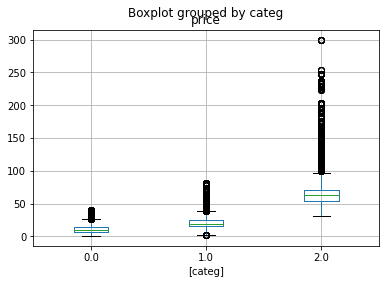

In [16]:
boxplot = df_all.boxplot(column=['price'], by=["categ"])

with this boxplot we can see that the category is influenced by the price like this :
price less that 50 category 0
price less than 100 category 1 
price more than 100 category 2

with this value we can confirm there is no correletion between the sex and the category
in fact the sex got no incidence with the value of an object

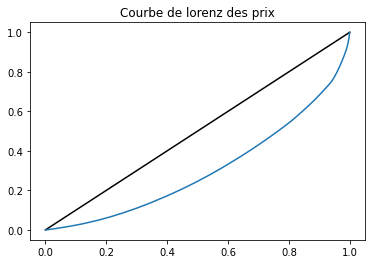

In [17]:
dep = df_all.price
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz)

xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot([0,1], [0,1], color='k')
plt.plot(xaxis,lorenz)
plt.title("Courbe de lorenz des prix")
plt.show()

transform the birth date into ages

In [18]:
def age(x):
    x = 2022-x
    return x
df_all = df_all.rename(columns={"birth": "age"})
df_all['age'] = df_all['age'].apply(age)
df_all = df_all.rename(columns={"birth": "age"})
df_all

,id_prod,date,session_id,client_id,sex,age,price,categ,total_achats
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,1,45,4.99,0.0,1186.65
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,1,22,65.75,2.0,526.75
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,1,43,10.71,1.0,878.23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,0,59,4.20,0.0,33.99
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,1,42,8.99,0.0,388.52
...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,0,53,31.99,1.0,54442.92
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,0,31,22.99,0.0,1156.49
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,1,54,11.03,0.0,1189.51
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,1,28,50.99,2.0,1282.37


Create new column with date with the format Y

In [19]:
df_all['date_format'] = df_all['date'].str[0:7]
df_all

,id_prod,date,session_id,client_id,sex,age,price,categ,total_achats,date_format
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,1,45,4.99,0.0,1186.65,2021-04
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,1,22,65.75,2.0,526.75,2022-02
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,1,43,10.71,1.0,878.23,2021-09
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,0,59,4.20,0.0,33.99,2021-10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,1,42,8.99,0.0,388.52,2021-07
...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,0,53,31.99,1.0,54442.92,2021-05
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,0,31,22.99,0.0,1156.49,2021-06
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,1,54,11.03,0.0,1189.51,2021-03
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,1,28,50.99,2.0,1282.37,2021-10


groupby the date and the age to see how many sail per month

In [20]:
df_sail_month = df_all.groupby(by=["date_format","age"]).count().reset_index()
df_sail_month

,date_format,age,id_prod,date,session_id,client_id,sex,price,categ,total_achats
0,2021-03,18,596,596,596,596,596,596,596,596
1,2021-03,19,207,207,207,207,207,207,207,207
2,2021-03,20,136,136,136,136,136,136,136,136
3,2021-03,21,170,170,170,170,170,170,170,170
4,2021-03,22,187,187,187,187,187,187,187,187
...,...,...,...,...,...,...,...,...,...,...
907,2022-02,89,29,29,29,29,29,29,29,29
908,2022-02,90,15,15,15,15,15,15,15,15
909,2022-02,91,9,9,9,9,9,9,9,9
910,2022-02,92,13,13,13,13,13,13,13,13


marbark age by sails per month

In [21]:
source = df_sail_month

# alt.Chart(source).mark_bar().encode(
#     alt.X("age", bin=alt.Bin(maxbins=20), title = "age"),
#     alt.Y('total_achats', title = "sails per month"),
# )

we can see that the clients that buy the most per month are the 40-45 years old

markbar sex by categ to visualise the correlation between the gender and the category of the purchase

changing category format from 0.1.2 to 1.2.3 because altair can't represent the 0

In [22]:
def categ(x):
    x = x+1
    return(x)
df_all['categ'] = df_all["categ"].apply(categ)
df_all

,id_prod,date,session_id,client_id,sex,age,price,categ,total_achats,date_format
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,1,45,4.99,1.0,1186.65,2021-04
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,1,22,65.75,3.0,526.75,2022-02
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,1,43,10.71,2.0,878.23,2021-09
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,0,59,4.20,1.0,33.99,2021-10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,1,42,8.99,1.0,388.52,2021-07
...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,0,53,31.99,2.0,54442.92,2021-05
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,0,31,22.99,1.0,1156.49,2021-06
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,1,54,11.03,1.0,1189.51,2021-03
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,1,28,50.99,3.0,1282.37,2021-10


In [23]:
alt.data_transformers.disable_max_rows()
source = df_all

# alt.Chart(source).mark_bar().encode(
#     x='sum(categ)',
#     y='sex',
#     color='categ',
#     order=alt.Order(
#       'categ',
#       sort='ascending'
#     )
# )

groupby age and category the correlation between those two

In [24]:
source = df_all

# alt.Chart(source).mark_bar().encode(
#     alt.X("sum(categ)", title = "category"),
#     alt.Y('age', bin=alt.Bin(maxbins=10), title = "age"),
#     color='categ',
#     order=alt.Order(
#       # Sort the segments of the bars by this field
#       'categ',
#       sort='ascending'
#     )
)

SyntaxError: unmatched ')' (2414440133.py, line 12)

with this graph, we can  see that the age of the client got a big influence of the category he buy.
The 20-30 buy the most product in the category 2 and 3
the 30-60 buy the most product in the category 1

In [ ]:
df_panier = df_all.groupby(["session_id","age"])['id_prod'].count().reset_index(name='id_prod')
df_panier = df_panier.groupby("age")['id_prod'].mean().reset_index(name='id_prod')
df_panier